### 1.Load dataset

In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive

In [ ]:
missing_value_formats = ["n.a.","?","NA","n/a", "na", "--"]

drive.mount('/content/drive/',force_remount=True)
drive.mount('/drive/', force_remount=True)
dataset=pd.read_csv('/drive/My Drive/Lambton/T2/AML-2103 Data Visualization/Assignment_1/dataset/data.csv', na_values=missing_value_formats)

Mounted at /content/drive/
Mounted at /drive/


### 2.Dataset exploration

In [ ]:
dataset.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,12000.000000,11931.000000,11970.000000,11994.000000,12000.000000,12000.000000,12000.000000,1.200000e+04
mean,2010.366417,249.212304,5.626149,3.433967,26.652583,19.731667,1562.599750,4.047974e+04
std,7.610080,108.942442,1.776181,0.882499,8.843787,8.958944,1444.032657,5.992542e+04
min,1990.000000,55.000000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.000000,4.000000,2.000000,22.000000,16.000000,549.000000,2.099500e+04
50%,2015.000000,227.000000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999000e+04
75%,2016.000000,300.000000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.217625e+04
max,2017.000000,1001.000000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


In [ ]:
dataset.shape

(12000, 16)

In [ ]:
dataset.dtypes

Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Number of Doors      float64
Market Category       object
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object

###3.Missing/null values handling

In [ ]:
#Look at your missing data
print(dataset.isnull().sum())


Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64


In [ ]:
# Assessing some NaN values
display(dataset.iloc[90:100])

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
90,Nissan,200SX,1997,regular unleaded,140.0,4.0,MANUAL,front wheel drive,2.0,Performance,Compact,Coupe,29,21,2009,2000
91,Nissan,200SX,1997,regular unleaded,115.0,4.0,MANUAL,front wheel drive,2.0,NaN,Compact,Coupe,35,25,2009,2000
92,Nissan,200SX,1997,regular unleaded,115.0,4.0,MANUAL,front wheel drive,2.0,NaN,Compact,Coupe,35,25,2009,2000
93,Nissan,200SX,1998,regular unleaded,115.0,4.0,MANUAL,front wheel drive,2.0,NaN,Compact,Coupe,35,25,2009,2000
94,Nissan,200SX,1998,regular unleaded,115.0,4.0,MANUAL,front wheel drive,2.0,NaN,Compact,Coupe,35,25,2009,2000
95,Nissan,200SX,1998,regular unleaded,140.0,4.0,MANUAL,front wheel drive,2.0,Performance,Compact,Coupe,28,20,2009,2073
96,Nissan,240SX,1996,regular unleaded,155.0,4.0,MANUAL,rear wheel drive,2.0,Performance,Compact,Coupe,26,19,2009,3713
97,Nissan,240SX,1996,regular unleaded,155.0,4.0,MANUAL,rear wheel drive,2.0,Performance,Compact,Coupe,26,19,2009,3520
98,Nissan,240SX,1997,regular unleaded,155.0,4.0,MANUAL,rear wheel drive,2.0,Performance,Compact,Coupe,26,19,2009,3910
99,Nissan,240SX,1997,regular unleaded,155.0,4.0,MANUAL,rear wheel drive,2.0,Performance,Compact,Coupe,26,19,2009,4182


#### Imputation

- Market Category: will be replaced for "Unknown"
- Engine HP: will be replaced for the most common value (mode)
- Engine Cylinders: will bill replaced for the most common value (mode)
- Engine Fuel Type: will bill replaced the most common (value_counts())
- Number of Doors: will bill replaced the most common value (mode)

In [ ]:
dataset['Market Category'].fillna('Unknown', inplace=True)

In [ ]:
print('Most common value - Engine HP: ', dataset['Engine HP'].mode()[0])
print('Most common value - Engine Cylinders: ', dataset['Engine Cylinders'].mode()[0])
print('Most common value - Engine Fuel Type: ', dataset['Engine Fuel Type'].value_counts().index[0])
print('Most common value - Number of Doors: ', dataset['Number of Doors'].mode()[0])

Most common value - Engine HP:  200.0
Most common value - Engine Cylinders:  4.0
Most common value - Engine Fuel Type:  regular unleaded
Most common value - Number of Doors:  4.0


In [ ]:
dataset['Engine HP'].fillna(dataset['Engine HP'].mode()[0], inplace=True)

dataset['Engine Cylinders'].fillna(dataset['Engine Cylinders'].mode()[0], inplace=True)

dataset['Engine Fuel Type'].fillna(dataset['Engine Fuel Type'].value_counts().index[0], inplace=True)

dataset['Number of Doors'].fillna(dataset['Number of Doors'].mode()[0], inplace=True)

In [ ]:
# Reassessing missing data
print(dataset.isnull().sum())

Make                 0
Model                0
Year                 0
Engine Fuel Type     0
Engine HP            0
Engine Cylinders     0
Transmission Type    0
Driven_Wheels        0
Number of Doors      0
Market Category      0
Vehicle Size         0
Vehicle Style        0
highway MPG          0
city mpg             0
Popularity           0
MSRP                 0
dtype: int64


## 4.Data duplication handling


In [ ]:
dataset.loc[dataset.duplicated()]

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
14,BMW,1 Series,2013,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,19,3916,31500
18,Audi,100,1992,regular unleaded,172.0,6.0,MANUAL,front wheel drive,4.0,Luxury,Midsize,Sedan,24,17,3105,2000
20,Audi,100,1992,regular unleaded,172.0,6.0,MANUAL,front wheel drive,4.0,Luxury,Midsize,Sedan,24,17,3105,2000
24,Audi,100,1993,regular unleaded,172.0,6.0,MANUAL,front wheel drive,4.0,Luxury,Midsize,Sedan,24,17,3105,2000
25,Audi,100,1993,regular unleaded,172.0,6.0,MANUAL,front wheel drive,4.0,Luxury,Midsize,Sedan,24,17,3105,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,Chrysler,200,2017,flex-fuel (unleaded/E85),184.0,4.0,AUTOMATIC,front wheel drive,4.0,Flex Fuel,Midsize,Sedan,36,23,1013,22490
11996,Chrysler,200,2017,flex-fuel (unleaded/E85),184.0,4.0,AUTOMATIC,front wheel drive,4.0,Flex Fuel,Midsize,Sedan,36,23,1013,25690
11997,Chrysler,200,2017,flex-fuel (unleaded/E85),295.0,6.0,AUTOMATIC,all wheel drive,4.0,"Flex Fuel,Performance",Midsize,Sedan,28,18,1013,30900
11998,Chrysler,200,2017,flex-fuel (unleaded/E85),184.0,4.0,AUTOMATIC,front wheel drive,4.0,Flex Fuel,Midsize,Sedan,36,23,1013,27795


In [ ]:
dataset.drop(dataset.loc[dataset.duplicated()==True].index,inplace=True)

In [ ]:
dataset.loc[dataset.duplicated()]

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP


Now we can see that the are not duplicated values

## 5.Measure of central tendency and dispersion


### General statistics

In [ ]:
for y in dataset.columns:
    if(dataset[y].dtype.kind == 'f' or dataset[y].dtype.kind == 'i'):
      print(dataset[y].describe())
      print('\n')



count    11199.000000
mean      2010.714528
std          7.228211
min       1990.000000
25%       2007.000000
50%       2015.000000
75%       2016.000000
max       2017.000000
Name: Year, dtype: float64


count    11199.000000
mean       253.059916
std        109.890499
min         55.000000
25%        172.000000
50%        236.000000
75%        303.000000
max       1001.000000
Name: Engine HP, dtype: float64


count    11199.000000
mean         5.661488
std          1.796677
min          0.000000
25%          4.000000
50%          6.000000
75%          6.000000
max         16.000000
Name: Engine Cylinders, dtype: float64


count    11199.000000
mean         3.454416
std          0.872804
min          2.000000
25%          2.000000
50%          4.000000
75%          4.000000
max          4.000000
Name: Number of Doors, dtype: float64


count    11199.000000
mean        26.610590
std          8.977641
min         12.000000
25%         22.000000
50%         25.000000
75%         30.00000

### IQR

In [ ]:
list_features=['Engine HP','Engine Cylinders',"Number of Doors","highway MPG","Popularity","MSRP"]
for feature in list_features:
  IQR=dataset[feature].quantile(0.75)-dataset[feature].quantile(0.25)
  print(f'The IQR for {feature} is: {IQR}')


The IQR for Engine HP is: 131.0
The IQR for Engine Cylinders is: 2.0
The IQR for Number of Doors is: 2.0
The IQR for highway MPG is: 8.0
The IQR for Popularity is: 1460.0
The IQR for MSRP is: 21433.0


### Range

In [ ]:
for feature in dataset:
  if not isinstance(dataset[feature][0],str):
    range=dataset[feature].quantile(1)-dataset[feature].quantile(0)
    print(f'The range for {feature} is: {range}')

The range for Year is: 27.0
The range for Engine HP is: 946.0
The range for Engine Cylinders is: 16.0
The range for Number of Doors is: 2.0
The range for highway MPG is: 342.0
The range for city mpg is: 130.0
The range for Popularity is: 5655.0
The range for MSRP is: 2063902.0


## 6.Outlier detection and graphical presentation

### Identify features that could have outliers

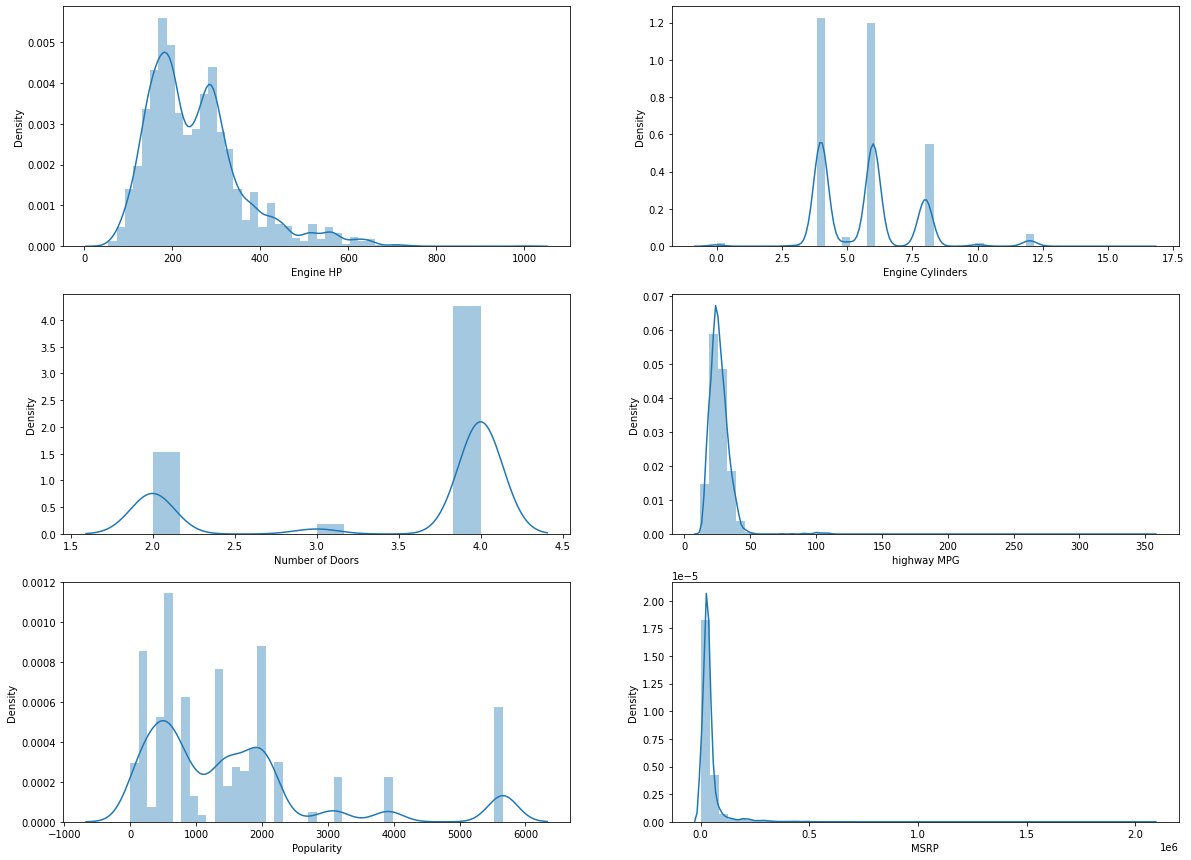

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(20,15))

list_features=['Engine HP','Engine Cylinders',"Number of Doors","highway MPG","Popularity","MSRP"]

for pos , feature in enumerate(list_features):
  plt.subplot(3,2,pos+1)
  sns.distplot(dataset[feature])

plt.show()

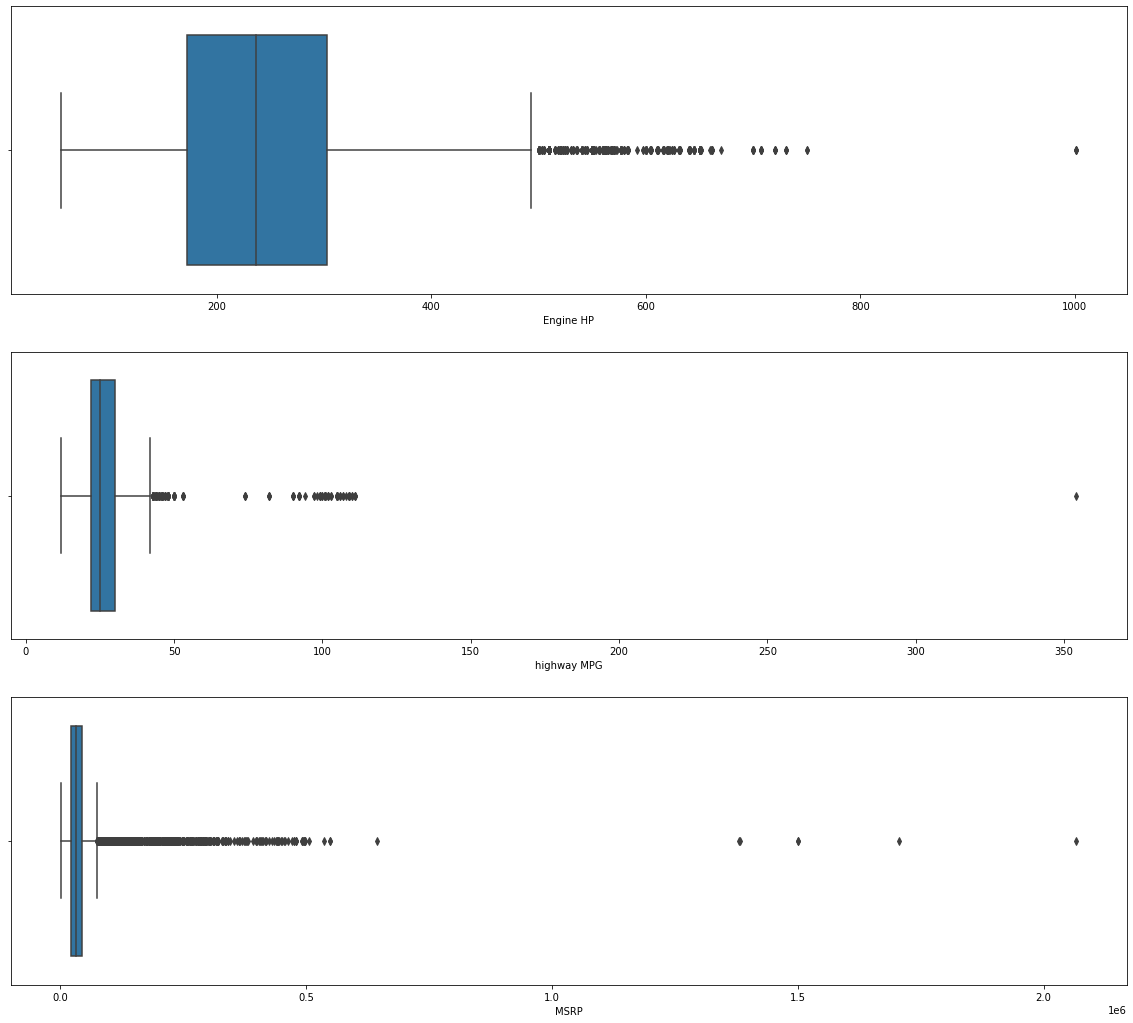

In [ ]:

list_features_outliers=['Engine HP',"highway MPG","MSRP"]
plt.figure(figsize=(20,18))
for pos , feature in enumerate(list_features_outliers):
  plt.subplot(3,1,pos+1)
  sns.boxplot(dataset[feature])

 according to theese graphs, it is possible to extract outliers from the features MSRP, highway MPG, and Engine HP

### Identify outliers

In [ ]:
dataset["outlier"]=0
list_features_outliers=['Engine HP',"highway MPG","MSRP"]
for feature in list_features_outliers:

  min_value = dataset[feature].mean() - (dataset[feature].std() * 2.7)
  if min_value<0:
    min_value=0
  max_value=dataset[feature].mean() + (dataset[feature].std() * 2.7)



  dataset.loc[(dataset[feature]>max_value)^(dataset[feature]<min_value),["outlier"]]=1

  outliers=dataset.loc[(dataset[feature]>max_value)^(dataset[feature]<min_value),:]
  print('*'*50,f'The amount of outliers in {feature} is: {outliers.shape[0]}','*'*20)
  print(f'The maximun value in {feature} is: {max_value}')
  print(f'The minimun value in {feature} is: {min_value}')
  print("  ")


  display(outliers)


************************************************** The amount of outliers in Engine HP is: 321 ********************
The maximun value in Engine HP is: 549.7642620590897
The minimun value in Engine HP is: 0
  


,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP,outlier
466,Ferrari,458 Italia,2013,premium unleaded (required),562.0,8.0,AUTOMATED_MANUAL,rear wheel drive,2.0,"Exotic,High-Performance",Compact,Convertible,17,13,2774,257412,1
467,Ferrari,458 Italia,2013,premium unleaded (required),562.0,8.0,AUTOMATED_MANUAL,rear wheel drive,2.0,"Exotic,High-Performance",Compact,Coupe,17,13,2774,233509,1
468,Ferrari,458 Italia,2014,premium unleaded (required),562.0,8.0,AUTOMATED_MANUAL,rear wheel drive,2.0,"Exotic,High-Performance",Compact,Coupe,17,13,2774,233509,1
469,Ferrari,458 Italia,2014,premium unleaded (required),597.0,8.0,AUTOMATED_MANUAL,rear wheel drive,2.0,"Exotic,High-Performance",Compact,Coupe,17,13,2774,288000,1
470,Ferrari,458 Italia,2014,premium unleaded (required),562.0,8.0,AUTOMATED_MANUAL,rear wheel drive,2.0,"Exotic,High-Performance",Compact,Convertible,17,13,2774,257412,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11509,BMW,X5 M,2016,premium unleaded (required),567.0,8.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Factory Tuner,Luxury,High-Performance",Midsize,4dr SUV,19,14,3916,98800,1
11510,BMW,X5 M,2017,premium unleaded (required),567.0,8.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Factory Tuner,Luxury,High-Performance",Midsize,4dr SUV,19,14,3916,98800,1
11523,BMW,X6 M,2015,premium unleaded (required),567.0,8.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Factory Tuner,Luxury,High-Performance",Midsize,4dr SUV,19,14,3916,102100,1
11524,BMW,X6 M,2016,premium unleaded (required),567.0,8.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Factory Tuner,Luxury,High-Performance",Midsize,4dr SUV,19,14,3916,102200,1


************************************************** The amount of outliers in highway MPG is: 72 ********************
The maximun value in highway MPG is: 50.85022033122348
The minimun value in highway MPG is: 2.370960131317819
  


,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP,outlier
539,FIAT,500e,2015,electric,200.0,0.0,DIRECT_DRIVE,front wheel drive,2.0,Hatchback,Compact,2dr Hatchback,108,122,819,31800,1
540,FIAT,500e,2016,electric,200.0,0.0,DIRECT_DRIVE,front wheel drive,2.0,Hatchback,Compact,2dr Hatchback,103,121,819,31800,1
541,FIAT,500e,2017,electric,200.0,0.0,DIRECT_DRIVE,front wheel drive,2.0,Hatchback,Compact,2dr Hatchback,103,121,819,31800,1
1119,Audi,A6,2017,premium unleaded (recommended),252.0,4.0,AUTOMATED_MANUAL,front wheel drive,4.0,Luxury,Midsize,Sedan,354,24,3105,51600,1
1680,Mercedes-Benz,B-Class Electric Drive,2015,electric,177.0,0.0,DIRECT_DRIVE,front wheel drive,4.0,"Hatchback,Luxury",Compact,4dr Hatchback,82,85,617,41450,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9868,Chevrolet,Spark EV,2014,electric,140.0,0.0,DIRECT_DRIVE,front wheel drive,4.0,Hatchback,Compact,4dr Hatchback,109,128,1385,27010,1
9869,Chevrolet,Spark EV,2015,electric,140.0,0.0,DIRECT_DRIVE,front wheel drive,4.0,Hatchback,Compact,4dr Hatchback,109,128,1385,25170,1
9870,Chevrolet,Spark EV,2015,electric,140.0,0.0,DIRECT_DRIVE,front wheel drive,4.0,Hatchback,Compact,4dr Hatchback,109,128,1385,25560,1
9871,Chevrolet,Spark EV,2016,electric,140.0,0.0,DIRECT_DRIVE,front wheel drive,4.0,Hatchback,Compact,4dr Hatchback,109,128,1385,25510,1


************************************************** The amount of outliers in MSRP is: 253 ********************
The maximun value in MSRP is: 208070.55624195383
The minimun value in MSRP is: 0
  


,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP,outlier
460,Ferrari,456M,2001,premium unleaded (required),442.0,12.0,AUTOMATIC,rear wheel drive,2.0,"Exotic,High-Performance",Compact,Coupe,14,9,2774,223970,1
461,Ferrari,456M,2001,premium unleaded (required),442.0,12.0,MANUAL,rear wheel drive,2.0,"Exotic,High-Performance",Compact,Coupe,15,9,2774,219775,1
462,Ferrari,456M,2002,premium unleaded (required),442.0,12.0,AUTOMATIC,rear wheel drive,2.0,"Exotic,High-Performance",Compact,Coupe,14,9,2774,228625,1
463,Ferrari,456M,2002,premium unleaded (required),442.0,12.0,MANUAL,rear wheel drive,2.0,"Exotic,High-Performance",Compact,Coupe,15,9,2774,224585,1
464,Ferrari,456M,2003,premium unleaded (required),442.0,12.0,AUTOMATIC,rear wheel drive,2.0,"Exotic,High-Performance",Compact,Coupe,14,9,2774,228625,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11394,Aston Martin,Virage,2012,premium unleaded (required),490.0,12.0,AUTOMATIC,rear wheel drive,2.0,"Exotic,High-Performance",Midsize,Coupe,18,13,259,208295,1
11395,Aston Martin,Virage,2012,premium unleaded (required),490.0,12.0,AUTOMATIC,rear wheel drive,2.0,"Exotic,High-Performance",Midsize,Convertible,18,13,259,223295,1
11448,Rolls-Royce,Wraith,2014,premium unleaded (required),624.0,12.0,AUTOMATIC,rear wheel drive,2.0,"Exotic,Luxury,High-Performance",Large,Coupe,21,13,86,284900,1
11449,Rolls-Royce,Wraith,2015,premium unleaded (required),624.0,12.0,AUTOMATIC,rear wheel drive,2.0,"Exotic,Luxury,High-Performance",Large,Coupe,21,13,86,294025,1


### Drop detected outliers

In [ ]:
outliers_count=dataset.loc[dataset.outlier==1].shape[0]
dataset.drop(dataset.loc[dataset.outlier==1,:].index,inplace=True)
dataset.drop(columns="outlier",inplace=True)
print(f'{outliers_count} rows dropped')

499 rows dropped


In [ ]:
dataset.sample(5)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
5536,Plymouth,Grand Voyager,1999,flex-fuel (unleaded/E85),158.0,6.0,AUTOMATIC,front wheel drive,4.0,Flex Fuel,Large,Passenger Minivan,22,16,535,2234
9468,Chevrolet,Silverado 1500 Classic,2007,flex-fuel (unleaded/E85),295.0,8.0,AUTOMATIC,rear wheel drive,4.0,Flex Fuel,Large,Extended Cab Pickup,19,14,1385,25915
2195,Chevrolet,Camaro,2017,premium unleaded (recommended),455.0,8.0,MANUAL,rear wheel drive,2.0,High-Performance,Midsize,Coupe,25,16,1385,41905
10333,Toyota,Tercel,1997,regular unleaded,93.0,4.0,MANUAL,front wheel drive,2.0,Unknown,Compact,Coupe,35,28,2031,2012
2559,Honda,Civic,2015,regular unleaded,143.0,4.0,AUTOMATIC,front wheel drive,4.0,Unknown,Compact,Sedan,39,30,2202,19290


## 7.Compare different features

### Identify relationship/correlation among the data

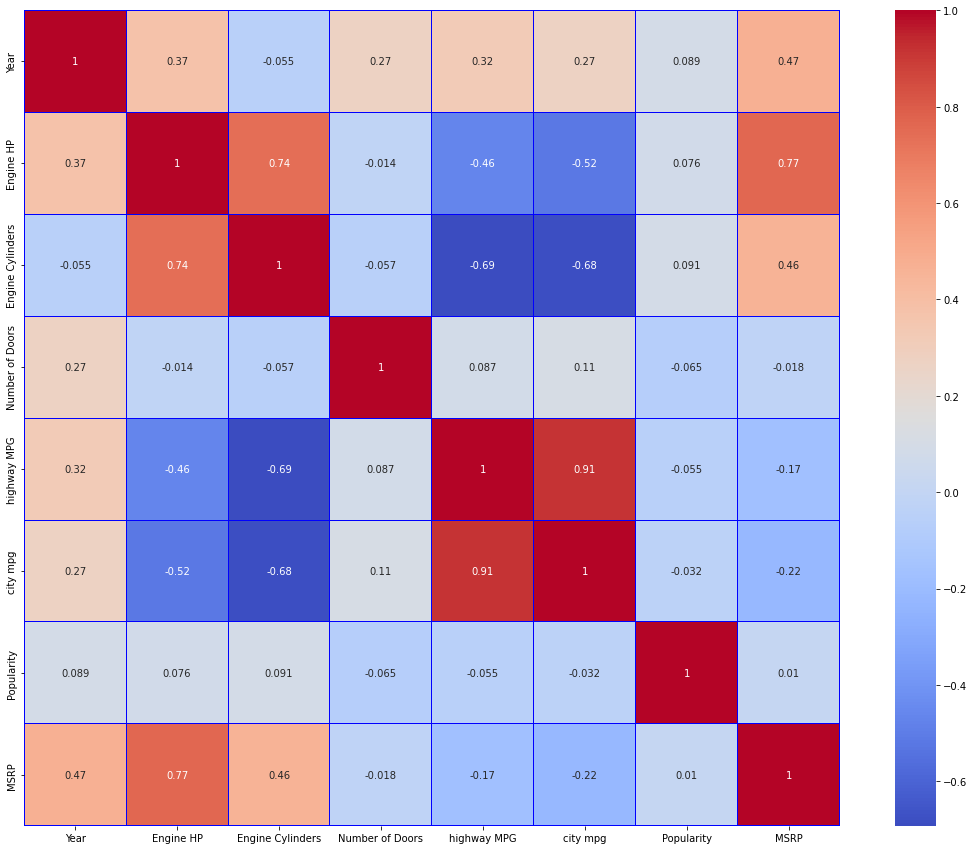

In [ ]:
plt.figure(figsize = (20,15))
sns.heatmap(dataset.corr(),square = True, linecolor = 'blue', linewidths = 0.05,annot = True, cmap = 'coolwarm')



### Compare higly correlated data

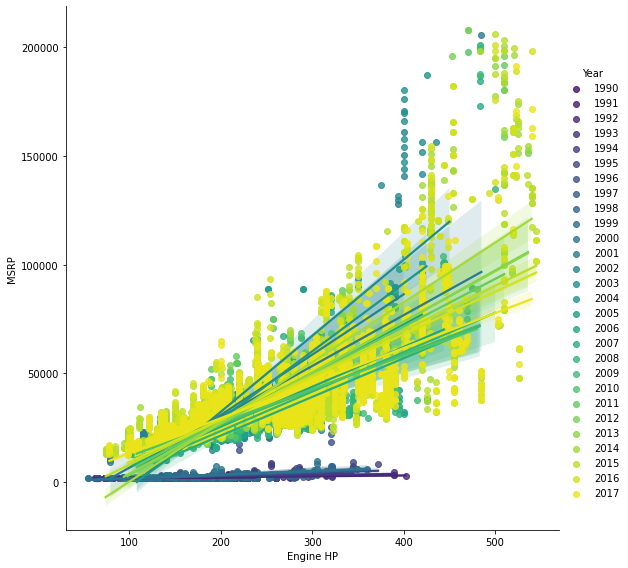

In [ ]:
g=sns.FacetGrid(dataset,hue="Year",size=8,palette="viridis")

g.map(sns.regplot,"Engine HP","MSRP")

g.add_legend()
plt.show()

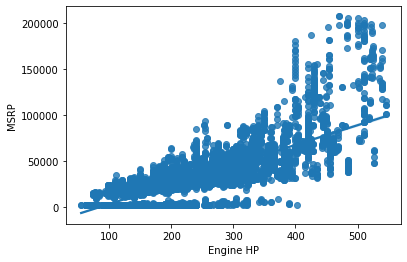

In [ ]:
sns.regplot(x=dataset["Engine HP"],y=dataset["MSRP"],data=dataset)

##8.Exploratory Data Analysis

### Popular vehicles per brand

In [ ]:
"""
  Select the first 15 popular cars.
  The remaining ones will be summed-up and labeled as "Others"
"""
vehicles=dataset['Make'].value_counts(ascending=False)
other=vehicles[16:].sum()
vehicles[16]=other
vehicles=vehicles[:17]

""" Create a df based on the most popular cars """
popular_vehicles_df=pd.DataFrame(vehicles).reset_index()
popular_vehicles_df.columns=['brand', 'qty']
popular_vehicles_df['brand']=popular_vehicles_df['brand'].replace(popular_vehicles_df['brand'].iloc[-1], 'Others')
popular_vehicles_df

,brand,qty
0,Chevrolet,1053
1,Ford,815
2,Toyota,711
3,Volkswagen,564
4,Nissan,538
5,Dodge,508
6,GMC,482
7,Honda,431
8,Mazda,412
9,Cadillac,387


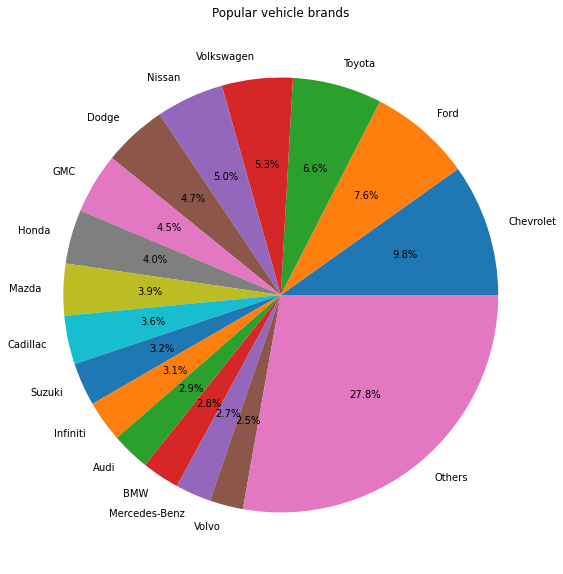

In [ ]:
plt.figure(figsize=(12,10))
plt.pie(popular_vehicles_df['qty'], labels=popular_vehicles_df['brand'], autopct="%.1f%%",)

plt.title("Popular vehicle brands")

plt.savefig('Popular vehicle brands.png')


### Popular vehicles transmission types

In [ ]:
transm_type=dataset['Transmission Type'].value_counts(ascending=False)
transm_type=transm_type[:4]

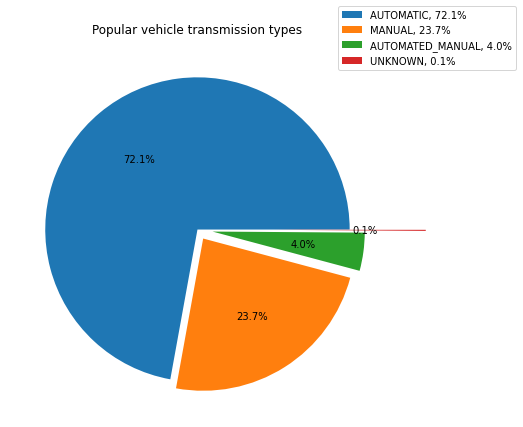

In [ ]:
plt.figure(figsize=(9,7))

explode=[0, 0.07, 0.1, 0.5]
plt.pie(transm_type.values,autopct='%.1f%%', explode=explode)

percents = transm_type.values * 100 / transm_type.values.sum()
plt.legend( bbox_to_anchor=(1.35,1.1), loc='upper right',
            labels=['%s, %.1f%%' % (l, s) for l, s in zip(transm_type.index,percents)])


plt.title("Popular vehicle transmission types")

plt.savefig('Popular vehicle transmission types')

### Popular vehicle style

In [ ]:
def map_vehicle_style(vehicle_style):
  if 'suv' in vehicle_style:
    return 'SUV'
  elif 'van' in vehicle_style:
    return 'Van'
  elif 'hatch' in vehicle_style:
    return 'Hatch'
  elif 'pickup' in vehicle_style:
    return 'Pickup'
  elif 'sedan' in vehicle_style:
    return 'Sedan'
  elif 'coupe' or 'convertible' in vehicle_style:
    return 'Luxury'
  else:
    return 'Others'

In [ ]:
dataset['Vehicle Style Label'] = dataset['Vehicle Style'].apply(lambda x: map_vehicle_style(x.lower()))
dataset['Vehicle Style Label'].value_counts()

Sedan     2727
SUV       2527
Luxury    2166
Pickup    1597
Hatch     1030
Van        653
Name: Vehicle Style Label, dtype: int64

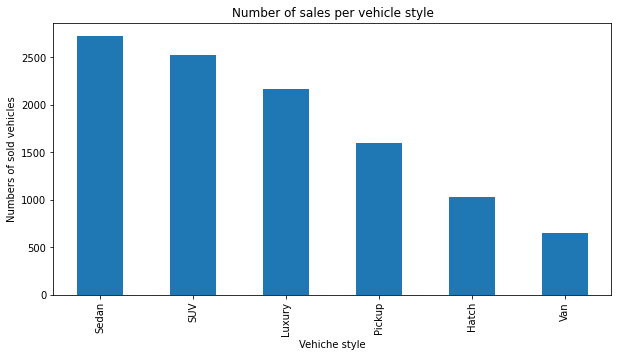

In [ ]:
dataset['Vehicle Style Label'].value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.xlabel('Vehiche style');
plt.xticks(rotation=90)
plt.ylabel('Numbers of sold vehicles')
plt.title("Number of sales per vehicle style")

plt.savefig('Number of sales per vehicle style')


### Number of vehicles sold over the years

In [ ]:
sold_cars_years=dataset['Year'].value_counts(ascending=False)[:10]
sold_cars_years

2015    1968
2016    1968
2017    1571
2014     488
2009     345
2007     327
2012     314
2008     308
2013     297
2011     266
Name: Year, dtype: int64

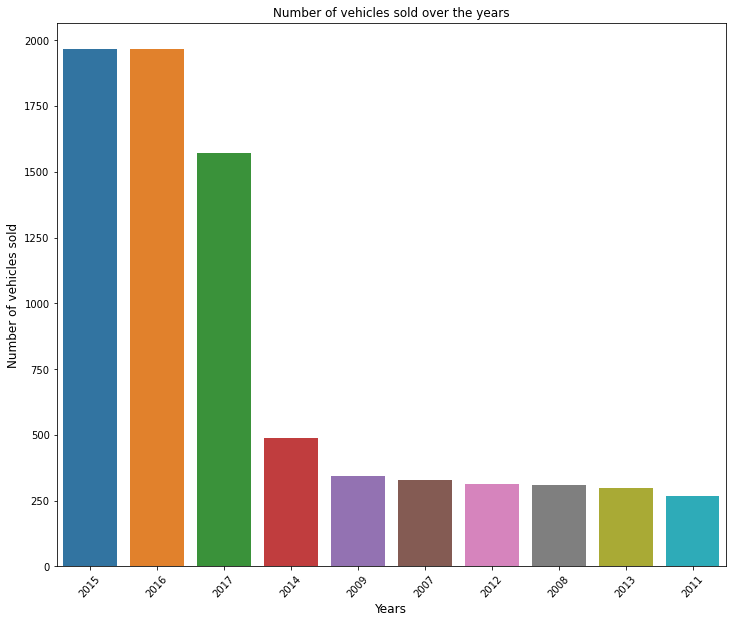

In [ ]:
fig, ax = plt.subplots(figsize=(12,10))
sns.barplot(x=sold_cars_years.index, y=sold_cars_years.values, ax=ax, order=sold_cars_years.index)

ax.set_xlabel('Years', fontsize=12)
ax.set_ylabel('Number of vehicles sold', fontsize=12)
ax.xaxis.set_tick_params(rotation=47)

plt.title('Number of vehicles sold over the years')

plt.savefig('Number of vehicles sold over the years')

plt.show()

### Vehicle size price over the last three years

In [ ]:
vsize_price_years=dataset.groupby(['Year', 'Vehicle Size'])['MSRP'].sum().reset_index()
vsize_price_years=vsize_price_years[vsize_price_years['Year'] >= 2015].reset_index()
vsize_price_years

,index,Year,Vehicle Size,MSRP
0,75,2015,Compact,24681335
1,76,2015,Large,26428887
2,77,2015,Midsize,30058619
3,78,2016,Compact,22603430
4,79,2016,Large,26724162
5,80,2016,Midsize,32265049
6,81,2017,Compact,15969455
7,82,2017,Large,22682634
8,83,2017,Midsize,24415100


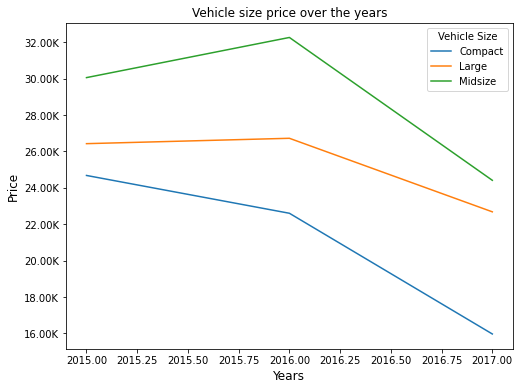

In [ ]:
fig, ax = plt.subplots(figsize=(8,6))

sns.lineplot('Year', 'MSRP', hue='Vehicle Size', data=vsize_price_years, ax=ax)

ax.set_xlabel('Years', fontsize=12)

ax.set_ylabel('Price', fontsize=12)

ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, pos: '{:,.2f}'.format(y/1000000) + 'K'))

plt.title('Vehicle size price over the years')

plt.savefig('Vehicle size price over the years')

plt.show()

### Vehicle style price over the last two years

In [ ]:
vstyle_price_years=dataset.groupby(['Year', 'Vehicle Style Label'])['MSRP'].sum().reset_index()
vstyle_price_years=vstyle_price_years[vstyle_price_years['Year'] >= 2016].reset_index()
vstyle_price_years

,index,Year,Vehicle Style Label,MSRP
0,153,2016,Hatch,3772075
1,154,2016,Luxury,17465666
2,155,2016,Pickup,9159575
3,156,2016,SUV,24844720
4,157,2016,Sedan,23196230
5,158,2016,Van,3154375
6,159,2017,Hatch,2908715
7,160,2017,Luxury,11648905
8,161,2017,Pickup,9056998
9,162,2017,SUV,20096676


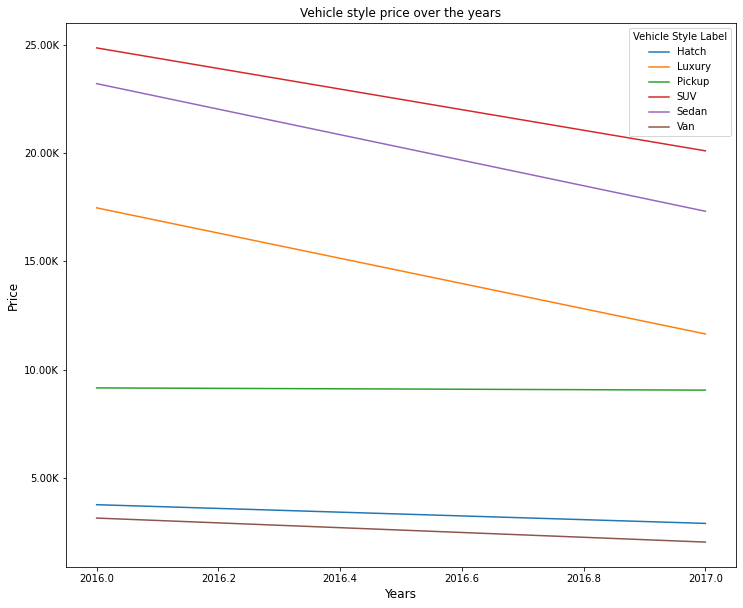

In [ ]:
fig, ax = plt.subplots(figsize=(12,10))

sns.lineplot('Year', 'MSRP', hue='Vehicle Style Label', data=vstyle_price_years, ax=ax)

ax.set_xlabel('Years', fontsize=12)

ax.set_ylabel('Price', fontsize=12)

ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, pos: '{:,.2f}'.format(y/1000000) + 'K'))

plt.title('Vehicle style price over the years')

plt.savefig('Vehicle style price over the years')

plt.show()

### Influence of the engine power on the car price

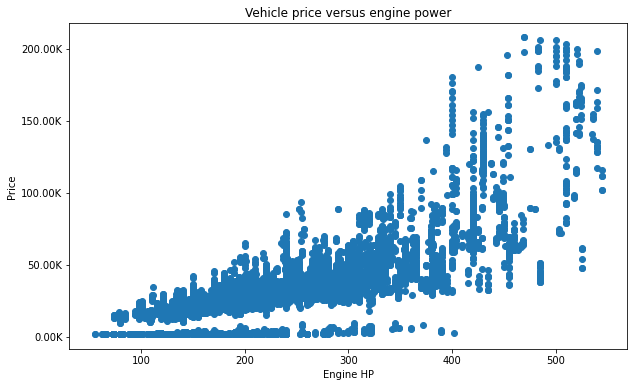

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))

ax.scatter(dataset['Engine HP'], dataset['MSRP'])

ax.set_xlabel('Engine HP')

ax.set_ylabel('Price')

ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, pos: '{:,.2f}'.format(y/1000) + 'K'))

plt.title('Vehicle price versus engine power')

plt.savefig('Vehicle price versus engine power')

plt.show()

### Sales percentile per price group

In [ ]:
dataset['Price Group'] = pd.cut(dataset['MSRP'],[0,10000,20000,30000,40000,50000,60000,70000,80000],
                                  labels = ['<10K','10-19K','20-29K','30-39K','40-49K','50-59k','60-69K','70-79K'], include_lowest = True)
dataset['Price Group'] = dataset['Price Group'].astype(object)

sales_price_group=(dataset['Price Group'].value_counts() / len(dataset)) * 100

sales_price_group


20-29K    28.065421
30-39K    22.841121
<10K      12.691589
40-49K    12.485981
10-19K     9.663551
50-59k     5.224299
60-69K     3.224299
70-79K     1.420561
Name: Price Group, dtype: float64

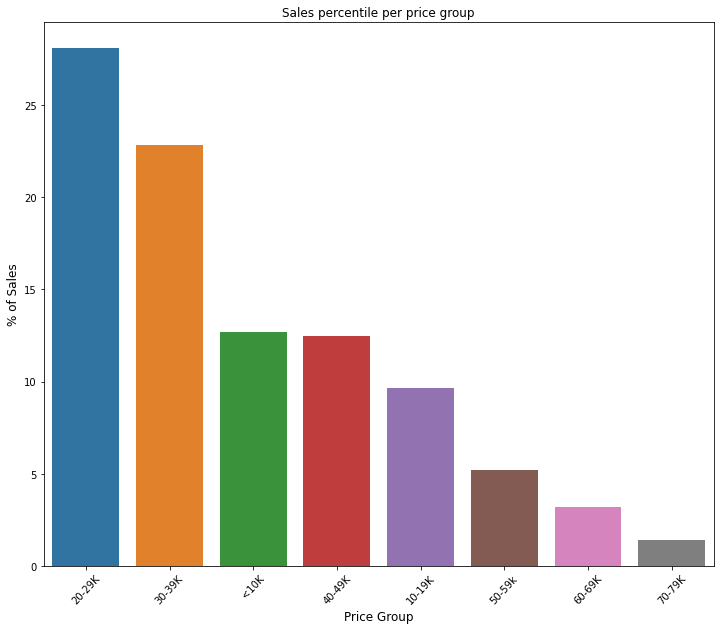

In [ ]:
fig, ax = plt.subplots(figsize=(12,10))
sns.barplot(x=sales_price_group.index, y=sales_price_group.values, ax=ax, order=sales_price_group.index)

ax.set_xlabel('Price Group', fontsize=12)
ax.set_ylabel('% of Sales', fontsize=12)
ax.xaxis.set_tick_params(rotation=47)

plt.title('Sales percentile per price group')

plt.savefig('Sales percentile per price group')

plt.show()
